<a href="https://colab.research.google.com/github/VictorAlfa/ITLab_Python/blob/main/Atividade_2_Campeonato_Brasileiro_Proderj_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (AED)

Campeonato Brasileiro da Série A de 2009 até 2018

O segundo trabalho do curso é uma análise exploratória de dados (AED). O conjunto de dados (dataset) é o Campeonato_Brasileiro.csv, que contém dados do Campeonato Brasileiro da Série A entre os anos de 2009 e 2018.

O trabalho não possui um roteiro pre-estabelecido e o objetivo é apresentar informações relevantes para a compreensão do campeonato e do desempenho dos times.

Apesar de não haver um roteiro, alguns itens são obrigatórios:

O trabalho deverá apresentar de seis a dez análises, e um mínimo de três gráficos para uma maior clareza sobre o comportamento dos dados.  Abaixo, destaco dez sugestões de análises:

* A quantidade de campeonatos brasileiros que cada clube participou, bem como os anos em que isto ocorreu
* A quantidade de títulos de cada clube e o ano em que foram campeões
* O maior vice-campeão e os anos em que foi vice
* O 5 maiores pontuadores do campeonato
* A média de pontos de todos os campeões
* O campeão com a menor pontuação e o ano em que ocorreu
* O campeão com a maior pontuação e o ano em que ocorreu
* O saldo de gols do campeão e do primeiro time rebaixado por ano
* As maiores folhas salariais por ano e a indicação se o clube com a maior folha sagrou-se campeão naquele ano
* A média de idade dos campeões por ano
* A média de idade dos últimos colocados por ano
* A Média e o desvio-padrão de pontos para ir a Libertadores direto (chegar entre os 4 primeiros sem ter que ir a pré-libertadores)

Além destas, deixo para a criatividade de cada analista a inclusão ou substituição de outras análises que acharem interessantes.




Legenda do Dataset
* Posicao: Classificação final no campeonato braileiro daquele ano.
* Saldo: Saldo de gols do time, gols feitos - gols sofridos.
* Estrangeiros: Quantidade de estrangeiros daquele time.
* Valor_Total: Soma dos preços dos jogadores de um time naquela temporada.
* Media_Valor: Media dos preços dos jogadores de um time naquela temporada: Valor_Total/Qtd_Jogadores.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Campeonato_Brasileiro.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,2018,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000
1,2018,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000
2,2018,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000
3,2018,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000
4,2018,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000


1. Quantidade de campeonatos brasileiros que cada clube participou e os anos:

           Clubes  Participações
17         Gremio             10
15     Fluminense             10
3     Atletico-MG             10
30      Sao Paulo             10
29         Santos             10
9     Corinthians             10
12       Cruzeiro             10
14       Flamengo             10
6        Botafogo              9
22      Palmeiras              9
19  Internacional              9
1    Athletico-PR              9
10       Coritiba              8
32          Vasco              7
31          Sport              7
33        Vitoria              7
5           Bahia              6
16          Goias              5
24    Ponte Preta              5
4            Avai              5
8     Chapecoense              5
13    Figueirense              5
2     Atletico-GO              4
7           Ceara              3
0      America-MG              3
21        Nautico              3
26       Prudente             

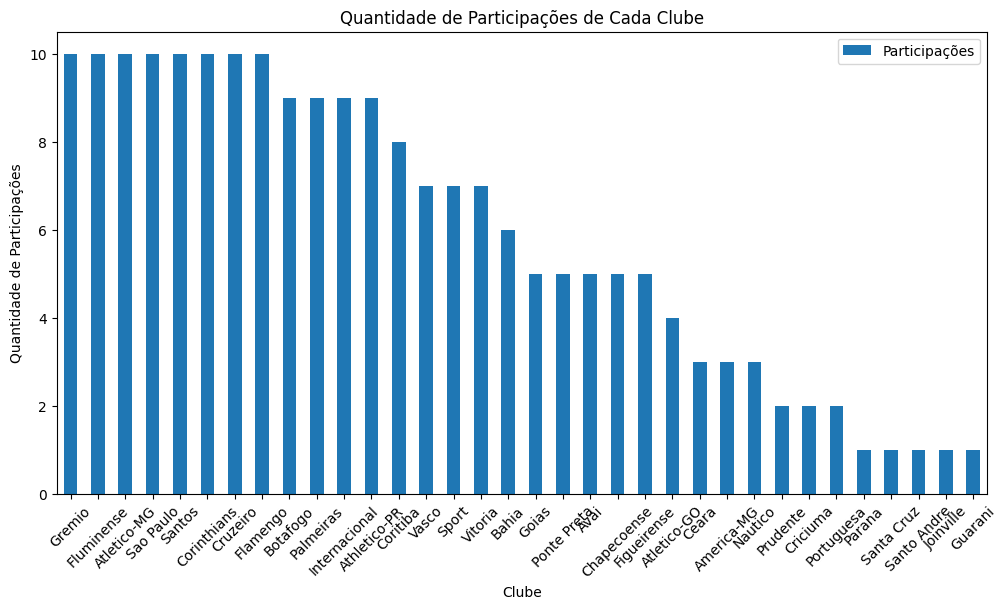

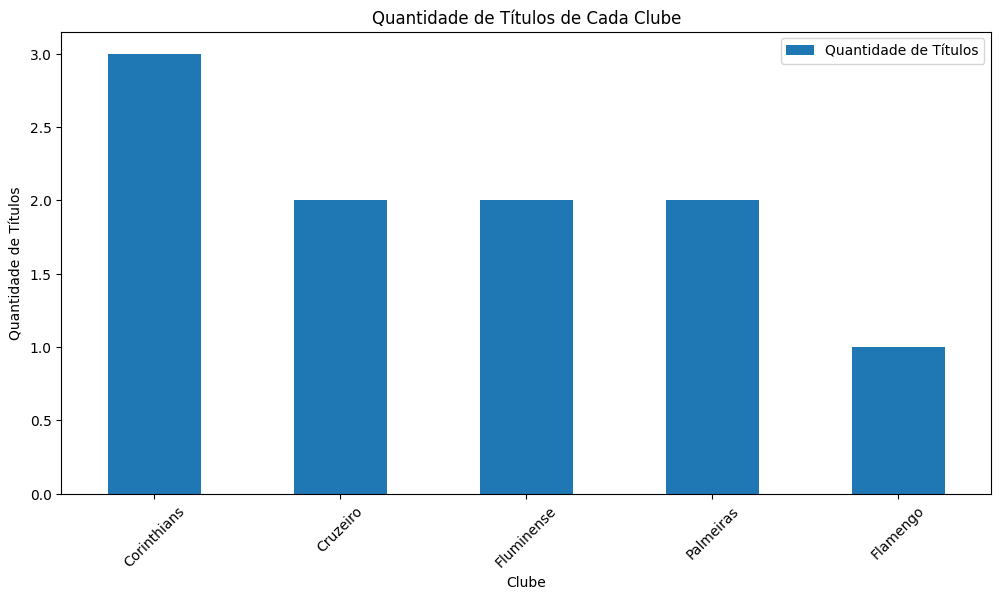

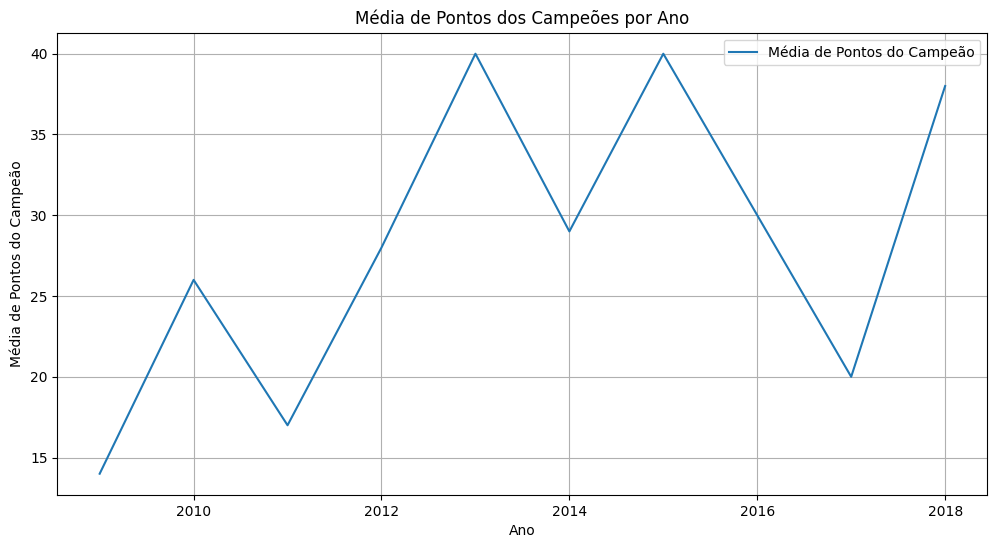

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o conjunto de dados
df = pd.read_csv('Campeonato_Brasileiro.csv')

# Análise 1: Quantidade de campeonatos brasileiros que cada clube participou e os anos
clubes_participacao = df.groupby('Clubes')['Ano'].nunique().reset_index()
clubes_participacao = clubes_participacao.rename(columns={'Ano': 'Participações'})
clubes_participacao = clubes_participacao.sort_values(by='Participações', ascending=False)
print("1. Quantidade de campeonatos brasileiros que cada clube participou e os anos:\n")
print(clubes_participacao)
print("")

# Análise 2: Quantidade de títulos de cada clube e o ano em que foram campeões
clubes_campeoes = df[df['Pos.'] == 1].groupby('Clubes')['Ano'].apply(list).reset_index()
clubes_campeoes = clubes_campeoes.rename(columns={'Ano': 'Anos de Título'})
clubes_campeoes['Quantidade de Títulos'] = clubes_campeoes['Anos de Título'].apply(len)
clubes_campeoes = clubes_campeoes.drop('Anos de Título', axis=1)
clubes_campeoes = clubes_campeoes.sort_values(by='Quantidade de Títulos', ascending=False)
print("\n2. Quantidade de títulos de cada clube e o ano em que foram campeões:\n")
print(clubes_campeoes)
print("")

# Análise 3: O maior vice-campeão e os anos em que foi vice
vice_campeao = df[df['Pos.'] == 2].groupby('Clubes')['Ano'].apply(list).reset_index()
vice_campeao = vice_campeao.rename(columns={'Ano': 'Anos de Vice-Campeonato'})
vice_campeao = vice_campeao.sort_values(by='Anos de Vice-Campeonato', ascending=False).head(1)
print("\n3. Maior vice-campeão e os anos em que foi vice:\n")
print(vice_campeao)
print("")

# Análise 4: Os 5 maiores pontuadores do campeonato
maiores_pontuadores = df.groupby(['Ano', 'Clubes'])['Saldo'].max().reset_index()
maiores_pontuadores = maiores_pontuadores.sort_values(by=['Ano', 'Saldo'], ascending=[True, False])
maiores_pontuadores = maiores_pontuadores.groupby('Ano').head(5)
print("\n4. Os 5 maiores pontuadores do campeonato:\n")
print(maiores_pontuadores)
print("")

# Análise 5: A média de pontos de todos os campeões
media_pontos_campeoes = df[df['Pos.'] == 1].groupby('Ano')['Saldo'].mean().reset_index()
media_pontos_campeoes = media_pontos_campeoes.rename(columns={'Saldo': 'Média de Pontos do Campeão'})
print("\n5. A média de pontos de todos os campeões:\n")
print(media_pontos_campeoes)
print("")

# Análise 6: O campeão com a menor pontuação e o ano em que ocorreu
campeao_menor_pontuacao = df[df['Pos.'] == 1].sort_values(by='Saldo').head(1)
print("\n6. Campeão com a menor pontuação e o ano em que ocorreu:\n")
print(campeao_menor_pontuacao[['Ano', 'Clubes', 'Saldo']])
print("")

# Análise 7: O campeão com a maior pontuação e o ano em que ocorreu
campeao_maior_pontuacao = df[df['Pos.'] == 1].sort_values(by='Saldo', ascending=False).head(1)
print("\n7. Campeão com a maior pontuação e o ano em que ocorreu:\n")
print(campeao_maior_pontuacao[['Ano', 'Clubes', 'Saldo']])
print("")

# Análise 8: Saldo de gols do campeão e do primeiro time rebaixado por ano
saldos_campeao_rebaixado = df[df['Pos.'].isin([1, 20])].groupby(['Ano', 'Pos.'])['Saldo'].sum().reset_index()
saldos_campeao_rebaixado = saldos_campeao_rebaixado.pivot(index='Ano', columns='Pos.', values='Saldo')
saldos_campeao_rebaixado = saldos_campeao_rebaixado.rename(columns={1: 'Saldo do Campeão', 20: 'Saldo do 1º Rebaixado'})
print("\n8. Saldo de gols do campeão e do primeiro time rebaixado por ano:\n")
print(saldos_campeao_rebaixado)
print("")

# Gráfico 1: Quantidade de participações de cada clube
clubes_participacao.plot(x='Clubes', y='Participações', kind='bar', figsize=(12, 6))
plt.title('Quantidade de Participações de Cada Clube')
plt.xlabel('Clube')
plt.ylabel('Quantidade de Participações')
plt.xticks(rotation=45)
plt.show()
print("")

# Gráfico 2: Quantidade de títulos de cada clube
clubes_campeoes.plot(x='Clubes', y='Quantidade de Títulos', kind='bar', figsize=(12, 6))
plt.title('Quantidade de Títulos de Cada Clube')
plt.xlabel('Clube')
plt.ylabel('Quantidade de Títulos')
plt.xticks(rotation=45)
plt.show()
print("")

# Gráfico 3: Média de pontos dos campeões por ano
media_pontos_campeoes.plot(x='Ano', y='Média de Pontos do Campeão', kind='line', figsize=(12, 6))
plt.title('Média de Pontos dos Campeões por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Pontos do Campeão')
plt.grid(True)
plt.show()
print("")